In [41]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

In [43]:
import os

In [45]:
os.chdir("C:\\Users\\HP\\Desktop\\code challenges\\datasets")

In [47]:
df = pd.read_csv("housing.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [75]:
df['ocean_proximity'] = np.random.choice(['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'], size=df.shape[0])


In [77]:
X = df.drop(columns='median_house_value')
y = df['median_house_value']

In [79]:
numerical_features = X.select_dtypes(include=['float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [81]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [83]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [85]:
def get_model(model_type, alpha=1.0, l1_ratio=0.5):
    if model_type == 'ridge':
        return Ridge(alpha=alpha)
    elif model_type == 'lasso':
        return Lasso(alpha=alpha)
    elif model_type == 'elasticnet':
        return ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    else:
        raise ValueError("Invalid model type. Choose 'ridge', 'lasso', or 'elasticnet'.")


In [87]:
models = ['ridge', 'lasso', 'elasticnet']
results = {}

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
for model_type in models:
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', get_model(model_type))])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_type] = {'mse': mse, 'r2': r2}
    print(f"{model_type.capitalize()} Model - MSE: {mse:.4f}, R²: {r2:.4f}")

Ridge Model - MSE: 5058841174.6155, R²: 0.6139
Lasso Model - MSE: 5059250576.8523, R²: 0.6139
Elasticnet Model - MSE: 6750322562.1638, R²: 0.4849


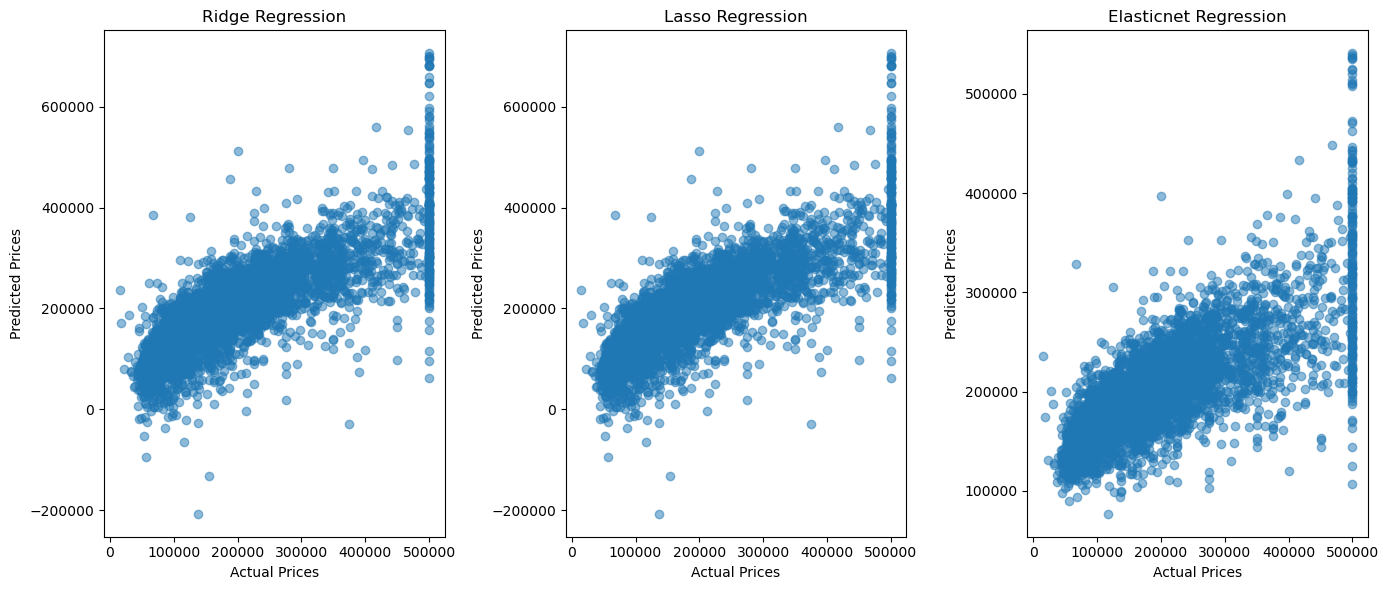

In [93]:
plt.figure(figsize=(14, 6))

for i, model_type in enumerate(models, start=1):
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', get_model(model_type))])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{model_type.capitalize()} Regression")

plt.tight_layout()
plt.show()